# Drawing Functions

## Draw a Line Segment on an Image

The `cv2.line` function in the OpenCV library allows you to draw a straight line segment connecting two specified points on an image. This function provides control over line appearance, thickness, and antialiasing, making it a versatile tool for various computer vision and image processing tasks {cite:p}`opencv_library, OpenCVDocumentation`.

* **syntax:**

```
cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> None
```

* **Parameters**

- `img`: The input image where the line will be drawn.
- `pt1`: The starting point (x, y) of the line segment.
- `pt2`: The ending point (x, y) of the line segment.
- `color`: The color of the line in BGR format (Blue, Green, Red).
- `thickness`: (Optional) The thickness of the line. Default is 1. Use a negative value to fill the line with the specified color.
- `lineType`: (Optional) The type of line to draw. Default is 8-connected line (cv2.LINE_8). Other options include 4-connected line (cv2.LINE_4) and antialiased line (cv2.LINE_AA).
- `shift`: (Optional) The fractional pixel shift within the line coordinates. Default is 0.

* **Line Types**

- `cv2.LINE_8`: 8-connected line. Used by default.
- `cv2.LINE_4`: 4-connected line.
- `cv2.LINE_AA`: Antialiased line, providing smoother edges.

* **Behavior**

- The line is clipped to remain within the image boundaries.
- Integer coordinates without antialiasing use Bresenham algorithms (8-connected or 4-connected).
- Thick lines have rounded endings for a smoother appearance.
- Antialiased lines are drawn using Gaussian filtering to reduce aliasing artifacts.

* **Return Value**

This function modifies the input image (`img`) directly to include the specified line segment. No return value is provided (`None`).

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt  # Import the plotting library

# Define color codes for convenience
Colors = {'White': (255, 255, 255),
            'Black': (0, 0, 0),
            'Red': (255, 0, 0),
            'Green': (0, 255, 0),
            'Blue': (0, 0, 255),
            'Yellow': (255, 255, 0),
            'Purple': (128, 0, 128),
            'Indigo': (75, 0, 130),
            'OrangeRed': (255, 69, 0)}

# Set font properties for plots
plt.rcParams.update({'font.family': 'Calibri', 'axes.titlesize': 16})

# Define a function to display images with titles and optional settings
def ImShow(Images, Names, title='Images', grayscale=False):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(9.5, 4))  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        # Display the image in grayscale if grayscale is True, otherwise in color
        ax[i].imshow(Images[i], cmap='gray' if grayscale else None)
        ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        ax[i].axis('off')  # Turn off axis
        ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        # Set main title if provided
        fig.suptitle(title, weight='bold', fontsize=18)

    plt.tight_layout()  # Adjust layout for better spacing

    return fig, ax

<span style='color:Blue'><strong>Example</strong></span>: In this example, we load sample images, create a modified image with a yellow line, and display both the original and modified images with titles. We employ the [image dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) from sklearn and perform fundamental operations using OpenCV.

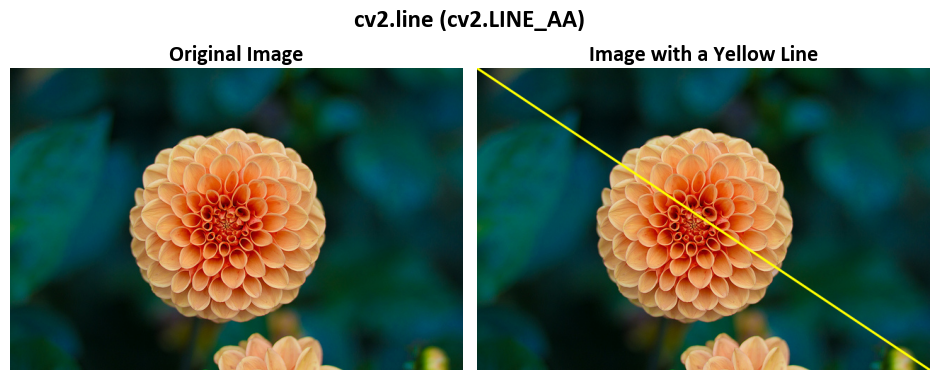

In [2]:
# In this example, we load sample images, create a modified image with a yellow line, 
# and display both the original and modified images with titles.
import cv2
from sklearn.datasets import load_sample_image

# Load an example image
Img = load_sample_image('flower.jpg')

# Create an image with a yellow line
Out = Img.copy()  # Create a copy of the image

# Draw a yellow line from top-left to bottom-right
_ = cv2.line(Out, (0, 0), Out.shape[:2][::-1], Colors['Yellow'], thickness=2, lineType=cv2.LINE_AA)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Yellow Line'], title='cv2.line (cv2.LINE_AA)')

In this code example, we perform the following tasks:

1. **Loading Sample Images:** We begin by importing the necessary libraries and loading a set of sample images using the `load_sample_images` function from the `sklearn.datasets` module. These images are stored in the `Images` variable.

2. **Extracting Image Names:** To give each image a meaningful title, we extract the image names from their file paths, remove the file extension (e.g., '.jpg'), and convert them to title case. The resulting names are stored in the `Names` variable.

3. **Creating a Modified Image:** We choose the second image from the loaded samples (`Images[1]`) and create a copy of it named `Out`. This copy allows us to make modifications without affecting the original image.

4. **Drawing a Yellow Line:** Using OpenCV's `cv2.line` function, we draw a yellow line on the `Out` image. The line is drawn from the top-left corner (coordinates (0, 0)) to the bottom-right corner, and we specify its color as yellow. Additionally, we set the line thickness to 2 pixels and use the `cv2.LINE_AA` line type for smoother rendering.

5. **Displaying Images:** Finally, we use a custom function called `ImShow` to display both the original image (`Img`) and the modified image (`Out`). We provide titles for these images, with the original image labeled as "Original Image" and the modified image labeled as "Image with a Yellow Line." Additionally, we set a title for the entire figure as "cv2.line (cv2.LINE_AA)."

## Rectangle

The function you're referring to is `cv2.rectangle` from the OpenCV library in Python. It's used to draw a rectangle on an image. Let's break down the function signature and its parameters {cite:p}`opencv_library, OpenCVDocumentation`:

**Function Signature:**

```
cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → None
```

**Parameters:**

- `img`: The input image on which the rectangle will be drawn.
- `pt1`: The coordinates (x1, y1) of the top-left corner of the rectangle.
- `pt2`: The coordinates (x2, y2) of the bottom-right corner of the rectangle.
- `color`: The color of the rectangle in BGR format (Blue, Green, Red).
- `thickness`: (Optional) The thickness of the rectangle's edges. If a positive value is given, it draws the edges of the rectangle. If a negative value is given, it fills the rectangle with the specified color. The default is 1, which draws a thin rectangle outline.
- `lineType`: (Optional) The type of the rectangle's edges. Default is 8-connected line (cv2.LINE_8). Other options include 4-connected line (cv2.LINE_4) and antialiased line (cv2.LINE_AA).
- `shift`: (Optional) The number of fractional bits in the point coordinates. This parameter allows sub-pixel positioning of the rectangle, providing smoother results for antialiased rectangles. The default is 0.

**Behavior:**

- The rectangle is drawn with the top-left corner specified by `pt1` and the bottom-right corner specified by `pt2`.
- The rectangle can be either a filled rectangle (when `thickness` is negative) or an outlined rectangle (when `thickness` is positive).
- The rectangle can be drawn with different line types, affecting the appearance of its edges (8-connected, 4-connected, or antialiased).

**Return Value:**

This function modifies the input image `img` directly, drawing the specified rectangle on it. The function does not return a value (`None`).

<font color='Blue'><b>Example</b></font>:

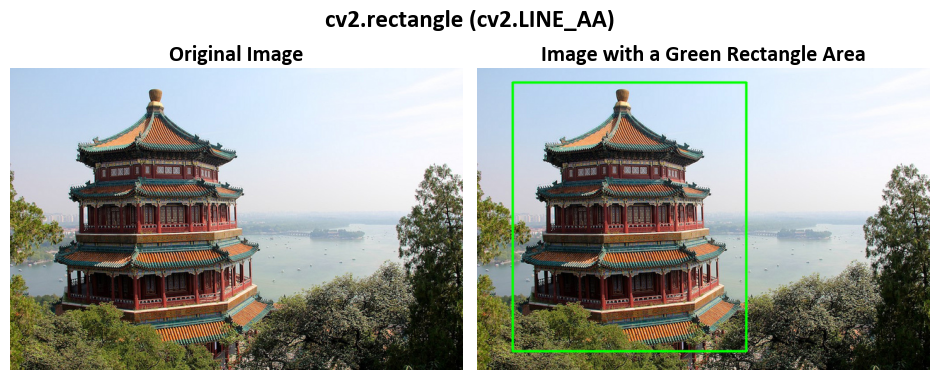

In [3]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example image
Img = load_sample_image('china.jpg')

# Create an image with a green rectangle
Out = Img.copy()  # Create a copy of the image

# Draw a green rectangle
_ = cv2.rectangle(Out, (50, 20), (380, 400), Colors['Green'], thickness=2, lineType=cv2.LINE_AA)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Green Rectangle Area'],
                 title='cv2.rectangle (cv2.LINE_AA)')

This code segment performs the following tasks:

1. **Create an image with a green rectangle**:
   - It starts by making a copy of the first loaded sample image (`Images[0]`) and stores it in the variable `Img`.
   - Then, it creates another copy of `Img` and stores it in the variable `Out`. This copy will be modified to include the green rectangle while keeping the original image (`Img`) intact.

2. **Draw a green rectangle**:
   - Using the `cv2.rectangle` function, a green rectangle is drawn on the `Out` image.
   - The parameters provided to `cv2.rectangle` specify the following:
     - `(50, 20)` and `(380, 400)` are the coordinates of the top-left and bottom-right corners of the rectangle, respectively.
     - `Colors['Green']` specifies the color of the rectangle (in this case, green).
     - `thickness=2` sets the thickness of the rectangle's border lines to 2 pixels.
     - `lineType=cv2.LINE_AA` specifies that anti-aliased (smoother) lines should be used for drawing.

3. **Show the original and modified images with titles**:
   - The `ImShow` function is used to display both the original image (`Img`) and the image with the green rectangle (`Out`).
   - Titles are added to each image for clarity. The first image is titled 'Original Image,' and the second image is titled 'Image with a Green Rectangle Area.'
   - The main title of the entire figure is set as 'cv2.rectangle (cv2.LINE_AA)'.
   
<font color='Blue'><b>Example</b></font>:

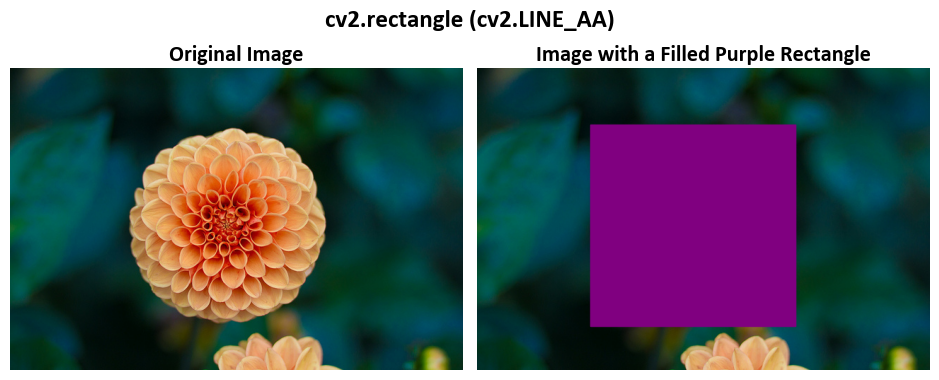

In [4]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example image
Img = load_sample_image('flower.jpg')

# Create a duplicate of the image for modification
Out = Img.copy()

# Draw a purple filled rectangle on the 'Out' image
_ = cv2.rectangle(Out, (160, 80), (450, 365), Colors['Purple'], thickness=-1, lineType=cv2.LINE_AA)

# Display both the original and modified images with descriptive titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Filled Purple Rectangle'],
                 title='cv2.rectangle (cv2.LINE_AA)')

Let's explain this code step by step:

1. `Img = Images[1].copy()`: In this step, we make a copy of the second image from the list of sample images (`Images`) and store it in the variable `Img`. This copy is created to ensure that the original image remains unchanged, and any modifications are made to this copy.

2. `Out = Img.copy()`: Here, we create a duplicate of the `Img` copy. The variable `Out` now contains an identical copy of the `Img` image. This duplication is necessary because we want to apply modifications to `Out` while keeping the original `Img` intact.

3. `_ = cv2.rectangle(Out, (160, 80), (450, 365), Colors['Purple'], thickness=-1, lineType=cv2.LINE_AA)`: In this line, we draw a filled purple rectangle on the `Out` image using the OpenCV `cv2.rectangle` function. The coordinates `(160, 80)` and `(450, 365)` define the top-left and bottom-right corners of the rectangle. The color is specified as `Colors['Purple']`, and `thickness=-1` indicates that the rectangle should be filled. The `cv2.LINE_AA` flag is used for anti-aliased (smooth) line drawing.

4. Finally, we use the `ImShow` function to display both the original image (`Img`) and the modified image with the purple filled rectangle (`Out`). The titles are set to 'Original Image' and 'Image with a Filled Purple Rectangle,' and the entire display is given the title 'cv2.rectangle (cv2.LINE_AA)'.

## Circle

This `cv2.circle` function is highly versatile and empowers you to specify the circle's center, radius, color, thickness, and other properties, giving you full control over the appearance of the circle you want to draw on the image {cite:p}`opencv_library, OpenCVDocumentation`.

```
cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
```

1. `cv2`: This is the namespace or module in OpenCV that provides a collection of functions for various image processing tasks.

2. `circle`: This function is specifically designed to draw circles on images using the OpenCV library.

3. `img`: This is the input image on which the circle will be drawn. It's represented as a NumPy array, and you'll be modifying this image to add the circle.

4. `center`: A tuple `(x, y)` representing the coordinates of the center of the circle within the image. The point `(0, 0)` is usually considered the top-left corner of the image.

5. `radius`: A numerical value that specifies the radius of the circle in pixels. This value determines the size of the circle.

6. `color`: The color of the circle, represented as a tuple with three elements `(B, G, R)`, where each element represents the intensity of the Blue, Green, and Red color channels, respectively. The values range from 0 to 255, indicating the color's intensity.

7. `thickness` (optional): An optional parameter that defines the thickness of the circle's outline. If this parameter is given a positive value, the circle is drawn with the specified thickness. Setting `thickness` to -1 results in a filled circle with the specified color.

8. `lineType` (optional): Another optional parameter that determines the type of boundary line for the circle. It's an integer value that indicates how the circle boundary is drawn. The default is typically an 8-connected line, which means the circle boundary is connected. An alternative option is `cv2.LINE_AA`, which creates an anti-aliased line, providing smoother edges.

9. `shift` (optional): An additional optional parameter that controls the precision of the center and radius by specifying the number of fractional bits. It's mainly used for fixed-point arithmetic and allows for finer control over the circle's position and size.

The `→ None` part in the documentation indicates that the function does not return any value. Instead, it directly modifies the input image by drawing the specified circle on it.

<font color='Blue'><b>Example</b></font>:

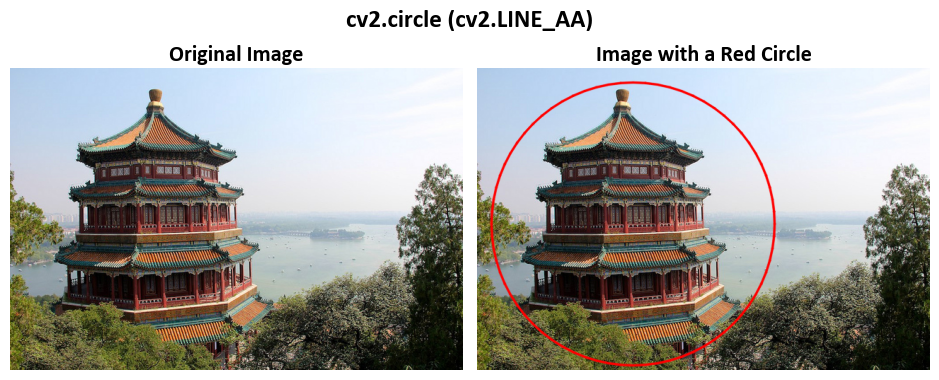

In [5]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example image
Img = load_sample_image('china.jpg')
Out = Img.copy()  # Create a duplicate of the image for modification

# Draw a red circle on the 'Out' image
_ = cv2.circle(Out, (220, 220), 200, Colors['Red'], thickness=2, lineType=cv2.LINE_AA)

# Display both the original and modified images with descriptive titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Red Circle'],
                 title='cv2.circle (cv2.LINE_AA)')

In this code:

1. `Img = Images[0].copy()`: We make a copy of the first image from the list of sample images and store it in the variable `Img`. This copy is created to ensure that the original image remains unchanged.

2. `Out = Img.copy()`: We create a duplicate of the `Img` copy. The variable `Out` now contains an identical copy of the `Img` image. This duplication is necessary because we want to apply modifications to `Out` while keeping the original `Img` intact.

3. `_ = cv2.circle(Out, (220, 220), 200, Colors['Red'], thickness=2, lineType=cv2.LINE_AA)`: In this line, we draw a red circle on the `Out` image using the OpenCV `cv2.circle` function. The center of the circle is specified as `(220, 220)`, the radius is set to `200`, and the color is specified as `Colors['Red']`. The `thickness=2` parameter indicates the thickness of the circle's border, and `lineType=cv2.LINE_AA` is used for anti-aliased (smooth) circle drawing.

4. Finally, we use the `ImShow` function to display both the original image (`Img`) and the modified image with the red circle (`Out`). The titles are set to 'Original Image' and 'Image with a Red Circle,' and the entire display is given the title 'cv2.circle (cv2.LINE_AA).'


<font color='Blue'><b>Example</b></font>:

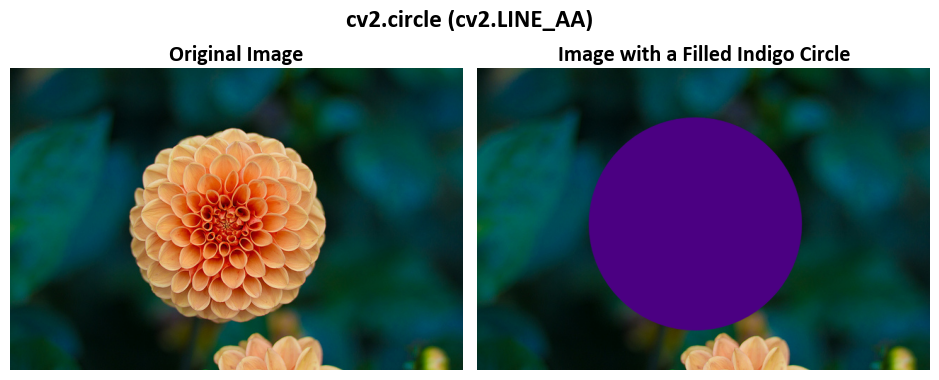

In [6]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example image
Img = load_sample_image('flower.jpg')
Out = Img.copy()  # Create a duplicate of the image for modification

# Draw a filled indigo circle on the 'Out' image
_ = cv2.circle(Out, (308, 220), 150, Colors['Indigo'], thickness=-1, lineType=cv2.LINE_AA)

# Display both the original and modified images with descriptive titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Filled Indigo Circle'],
                 title='cv2.circle (cv2.LINE_AA)')

In this code:

1. `Img = Images[1].copy()`: We make a copy of the second image from the list of sample images and store it in the variable `Img`. This copy is created to ensure that the original image remains unchanged.

2. `Out = Img.copy()`: We create a duplicate of the `Img` copy. The variable `Out` now contains an identical copy of the `Img` image. This duplication is necessary because we want to apply modifications to `Out` while keeping the original `Img` intact.

3. `_ = cv2.circle(Out, (308, 220), 150, Colors['Indigo'], thickness=-1, lineType=cv2.LINE_AA)`: In this line, we draw a filled indigo circle on the `Out` image using the OpenCV `cv2.circle` function. The center of the circle is specified as `(308, 220)`, the radius is set to `150`, and the color is specified as `Colors['Indigo']`. The `thickness=-1` parameter indicates that the circle should be filled, and `lineType=cv2.LINE_AA` is used for anti-aliased (smooth) circle drawing.

4. Finally, we use the `ImShow` function to display both the original image (`Img`) and the modified image with the filled indigo circle (`Out`). The titles are set to 'Original Image' and 'Image with a Filled Indigo Circle,' and the entire display is given the title 'cv2.circle (cv2.LINE_AA).'

## Ellipse


This `cv2.ellipse` function is versatile and empowers you to specify the ellipse's center, major and minor axes, rotation angle, arc angles, color, thickness, and other properties, giving you full control over the appearance of the ellipse you want to draw on the image {cite:p}`opencv_library, OpenCVDocumentation`.

```
cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) → None
```

1. `cv2`: This is the namespace or module in OpenCV that contains various image processing functions.

2. `ellipse`: This function is specifically designed to draw ellipses (oval shapes) on images using the OpenCV library.

3. `img`: This is the input image on which the ellipse will be drawn. It's represented as a NumPy array, and you'll be modifying this image to add the ellipse.

4. `center`: A tuple `(x, y)` representing the coordinates of the center of the ellipse within the image. The point `(0, 0)` is typically considered the top-left corner of the image.

5. `axes`: A tuple `(majorAxis, minorAxis)` representing the lengths of the major and minor axes of the ellipse. These axes determine the size and shape of the ellipse.

6. `angle`: The rotation angle of the ellipse in degrees. The rotation is applied to the major axis, which helps you orient the ellipse in a specific direction.

7. `startAngle`: The starting angle of the elliptical arc in degrees. The arc is drawn from this angle.

8. `endAngle`: The ending angle of the elliptical arc in degrees. The arc is drawn up to this angle, forming a partial ellipse if `startAngle` is not 0.

9. `color`: The color of the ellipse, represented as a tuple with three elements `(B, G, R)`, where each element represents the intensity of the Blue, Green, and Red color channels, respectively. The values range from 0 to 255, indicating the color's intensity.

10. `thickness` (optional): An optional parameter that defines the thickness of the ellipse's outline. If this parameter is given a positive value, the ellipse is drawn with the specified thickness. Setting `thickness` to -1 results in a filled ellipse with the specified color.

11. `lineType` (optional): Another optional parameter that determines the type of boundary line for the ellipse. It's an integer value that indicates how the ellipse boundary is drawn. The default is typically an 8-connected line, which means the boundary is connected. An alternative option is `cv2.LINE_AA`, which creates an anti-aliased line, providing smoother edges.

12. `shift` (optional): An additional optional parameter that controls the precision of the center and the axes by specifying the number of fractional bits. It's mainly used for fixed-point arithmetic, allowing for finer control over the ellipse's position, size, and rotation.

The `→ None` part in the documentation indicates that the function does not return any value. Instead, it directly modifies the input image by drawing the specified ellipse on it.

<font color='Blue'><b>Example</b></font>:

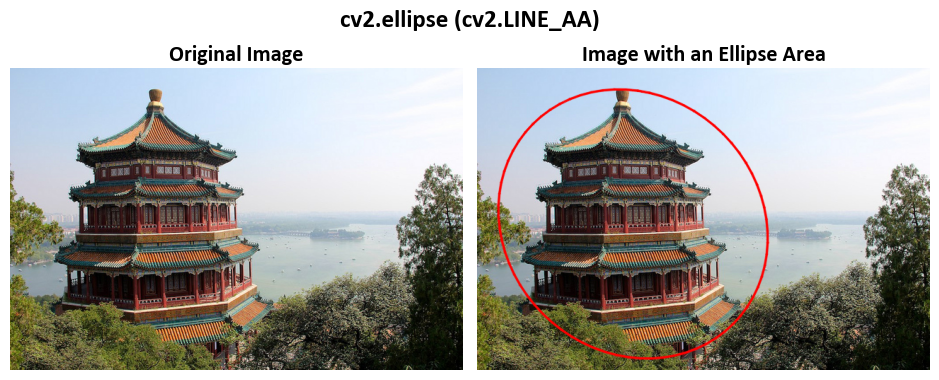

In [7]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example image
Img = load_sample_image('china.jpg')
Out = Img.copy()  # Create a copy of the image

# Draw a red ellipse
_ = cv2.ellipse(Out, (220, 220), (200, 180), 45, 0, 360, Colors['Red'], thickness=2, lineType=cv2.LINE_AA)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with an Ellipse Area'],
                 title='cv2.ellipse (cv2.LINE_AA)')

In this code:

1. `Img = Images[0].copy()`: We start by making a copy of the first image (`Images[0]`) from the list of sample images. The image data is copied into the `Img` variable. The comment mentions "Copy the second image," but it's actually copying the first image.

2. `Out = Img.copy()`: We then create a duplicate of the `Img` image and store it in the variable `Out`. This duplication ensures that we can apply modifications to `Out` while preserving the original `Img` image.

3. `_ = cv2.ellipse(Out, (220, 220), (200, 180), 45, 0, 360, Colors['Red'], thickness=2, lineType=cv2.LINE_AA)`: In this line, we draw a red ellipse on the `Out` image using the OpenCV `cv2.ellipse` function. The parameters define the ellipse as follows:
   - `(220, 220)`: Center of the ellipse.
   - `(200, 180)`: Major and minor axes lengths (horizontal and vertical).
   - `45`: Rotation angle of the ellipse in degrees.
   - `0, 360`: Start and end angles for drawing the full ellipse.
   - `Colors['Red']`: The color of the ellipse, specified as 'Red' from the predefined color dictionary.
   - `thickness=2`: The thickness of the ellipse boundary.
   - `lineType=cv2.LINE_AA`: The line type, set to `cv2.LINE_AA` for anti-aliased (smooth) rendering.

4. Finally, we use the `ImShow` function to display both the original image (`Img`) and the modified image with the red ellipse (`Out`). The titles are set to 'Original Image' and 'Image with an Ellipse Area,' and the entire display is given the title 'cv2.ellipse (cv2.LINE_AA).'

## Clip Line


The `cv2.clipLine` function is useful for various image processing tasks where you need to ensure that a line segment does not exceed the specified region, such as when rendering or analyzing objects within a certain image area {cite:p}`opencv_library, OpenCVDocumentation`.


```
cv2.clipLine(imgRect, pt1, pt2) → retval, pt1, pt2
```

1. `cv2`: This is the namespace or module in OpenCV that contains various image processing functions.

2. `clipLine`: This function is used for clipping a line segment within a given image rectangle using OpenCV.

3. `imgRect`: This parameter represents the rectangular region within which the line segment should be clipped. It's usually defined as a tuple or a rectangle object specifying the boundaries of the image region.

4. `pt1`: A tuple `(x1, y1)` representing the starting point of the line segment you want to clip. This point is defined by its x and y coordinates.

5. `pt2`: A tuple `(x2, y2)` representing the ending point of the line segment you want to clip. This point is also defined by its x and y coordinates.

6. `retval`: The return value of the function, which indicates whether the line segment lies fully, partially, or completely outside the specified image rectangle. This return value helps you understand whether the line segment was successfully clipped or not.

The `→` arrow in the documentation indicates that the function returns a value. In this case, it returns `retval`, which represents the result of the clipping operation, along with the updated `pt1` and `pt2` points, which may have been adjusted during the clipping process.

The purpose of this function is to ensure that a line segment defined by `pt1` and `pt2` lies within the specified image rectangle (`imgRect`). If the line segment extends beyond the boundaries of the rectangle, it is clipped to fit within the rectangle, and the function provides information about the clipping result.

<font color='Blue'><b>Example</b></font>:

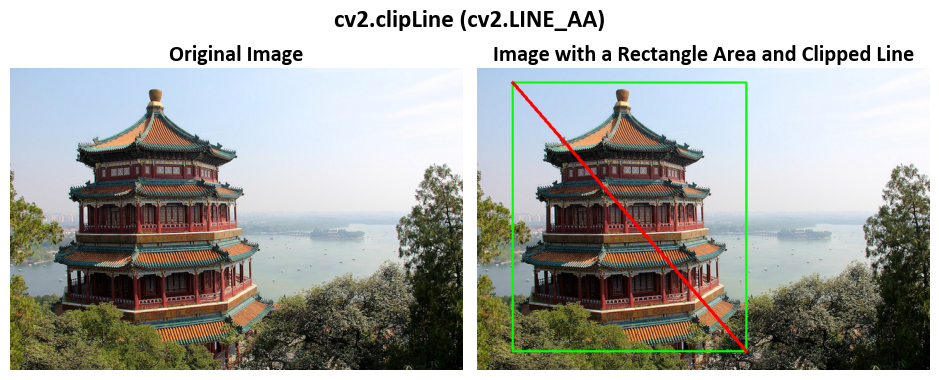

In [8]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example image
Img = load_sample_image('china.jpg')
Out = Img.copy()  # Create a copy of the image

# Draw a Clip Line
_ = cv2.rectangle(Out, (50, 20), (380, 400), Colors['Green'], 2)

# Use cv2.clipLine to determine the clipped line segment
_ = ret, p1, p2 = cv2.clipLine((0, 0, Out.shape[0], Out.shape[1]), (50, 20), (380, 400))

# Check if the line segment is within the image boundaries
if ret:
    cv2.line(Out, p1, p2, Colors['Red'], 3)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Rectangle Area and Clipped Line'],
                 title='cv2.clipLine (cv2.LINE_AA)')

In this code:

1. `Img = Images[0].copy()`: We start by making a copy of the first image (`Images[0]`) from the list of sample images. The image data is copied into the `Img` variable. The comment mentions "Copy the second image," but it's actually copying the first image.

2. `Out = Img.copy()`: We then create a duplicate of the `Img` image and store it in the variable `Out`. This duplication ensures that we can apply modifications to `Out` while preserving the original `Img` image.

3. `_ = cv2.rectangle(Out, (50, 20), (380, 400), Colors['Green'], 2)`: Here, we draw a green rectangle on the `Out` image using the OpenCV `cv2.rectangle` function. The parameters define the rectangle as follows:
   - `(50, 20)`: Coordinates of the top-left corner of the rectangle.
   - `(380, 400)`: Coordinates of the bottom-right corner of the rectangle.
   - `Colors['Green']`: The color of the rectangle, specified as 'Green' from the predefined color dictionary.
   - `2`: The thickness of the rectangle boundary.

4. `_ = ret, p1, p2 = cv2.clipLine((0, 0, Out.shape[0], Out.shape[1]), (50, 20), (380, 400))`: We use `cv2.clipLine` to determine the clipped line segment within the given image boundaries. This function takes the image boundaries (0, 0, width, height) as the first argument and the two endpoints of the line segment as the second and third arguments. If the line segment extends beyond the image boundaries, it is clipped to fit within the image.

5. `if ret:`: We check if the line segment is within the image boundaries (`ret` indicates whether clipping was successful).

6. `cv2.line(Out, p1, p2, Colors['Red'], 3)`: If the line segment is within the image boundaries, we draw it on the `Out` image using the `cv2.line` function. The endpoints `p1` and `p2` define the clipped line segment. It is drawn in red with a thickness of 3.

7. Finally, we use the `ImShow` function to display both the original image (`Img`) and the modified image with the rectangle and clipped line (`Out`). The titles are set to 'Original Image' and 'Image with a Rectangle Area and Clipped Line,' and the entire display is given the title 'cv2.clipLine (cv2.LINE_AA).'

## Get Text Size

The `cv2.getTextSize` function is valuable when you need to calculate the size of text before placing it on an image, ensuring that the text fits within a designated area and enabling accurate positioning for a variety of text rendering tasks in image processing {cite:p}`opencv_library, OpenCVDocumentation`.


```
cv2.getTextSize(text, fontFace, fontScale, thickness) → retval, baseLine
```

1. `cv2`: This is the namespace or module in OpenCV that contains various image processing functions.

2. `getTextSize`: This function is used to determine the size of a text string when rendered using a specific font and size, allowing you to prepare for text placement within images.

3. `text`: The input text string for which you want to determine the size. It's the text you plan to render on an image.

4. `fontFace`: An integer value representing the font type or face. This value specifies the font style or family to be used when rendering the text. Common font types include constants like `cv2.FONT_HERSHEY_SIMPLEX`, `cv2.FONT_HERSHEY_PLAIN`, etc.

5. `fontScale`: A numeric value specifying the size of the font. This value affects the relative size of the rendered text in relation to the image.

6. `thickness`: An integer value representing the thickness of the lines used to render the text. This parameter affects the visual weight or boldness of the text.

7. `retval`: The return value of the function, which is a tuple `(width, height)` representing the dimensions (width and height) of the bounding box that would enclose the rendered text string. This information helps you understand how much space the text will occupy when placed on the image.

8. `baseLine`: The baseline offset of the text. It's an additional return value indicating the distance from the top of the bounding box to the baseline of the first line of text. This is useful for accurately positioning the text on the image.

The `→` arrow in the documentation indicates that the function returns values. In this case, it returns `retval`, which contains the dimensions of the text bounding box, and `baseLine`, which provides the baseline offset for precise text placement.

## Put Text


The `cv2.putText` function is versatile and allows you to specify the text, its starting position, font, size, color, and other properties, giving you full control over the appearance and placement of the rendered text on the image {cite:p}`opencv_library, OpenCVDocumentation`.


```
cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) → None
```

1. `cv2`: This is the namespace or module in OpenCV that contains various image processing functions.

2. `putText`: This function is used to render text onto an image using the specified font, size, color, and position.

3. `img`: This is the input image on which the text will be drawn. It's represented as a NumPy array, and the function modifies this image to include the rendered text.

4. `text`: The input text string that you want to render on the image.

5. `org`: A tuple `(x, y)` representing the starting point (origin) of the text within the image. This point defines the position where the text's baseline starts, with `(0, 0)` typically being the top-left corner of the image.

6. `fontFace`: An integer value representing the font type or face to be used when rendering the text. This value specifies the font style or family, e.g., `cv2.FONT_HERSHEY_SIMPLEX`, `cv2.FONT_HERSHEY_PLAIN`, etc.

7. `fontScale`: A numeric value specifying the size of the font. This value affects the relative size of the rendered text in relation to the image.

8. `color`: The color of the rendered text, represented as a tuple with three elements `(B, G, R)`. Each element represents the intensity of the Blue, Green, and Red color channels, respectively, with values ranging from 0 to 255.

9. `thickness` (optional): An optional parameter that defines the thickness of the lines used to render the text. If this parameter is given a positive value, the text is drawn with the specified thickness. If it's set to -1, the text is filled with the specified color, creating a solid text shape.

10. `lineType` (optional): Another optional parameter that determines the type of boundary line for the text characters. It's an integer value that specifies how the characters are drawn. The default is typically a connected line (8-connected). An alternative option is `cv2.LINE_AA`, which creates an anti-aliased line, providing smoother edges for the characters.

11. `bottomLeftOrigin` (optional): An additional optional parameter that indicates whether the `org` point should be treated as the bottom-left corner or the top-left corner of the text bounding box. If `bottomLeftOrigin` is `True`, the `org` point is considered the bottom-left corner; otherwise, it's considered the top-left corner. The default value is `False`.

The `→ None` part in the documentation indicates that the function does not return any value. Instead, it directly modifies the input image by rendering the specified text on it.

<font color='Blue'><b>Example</b></font>:

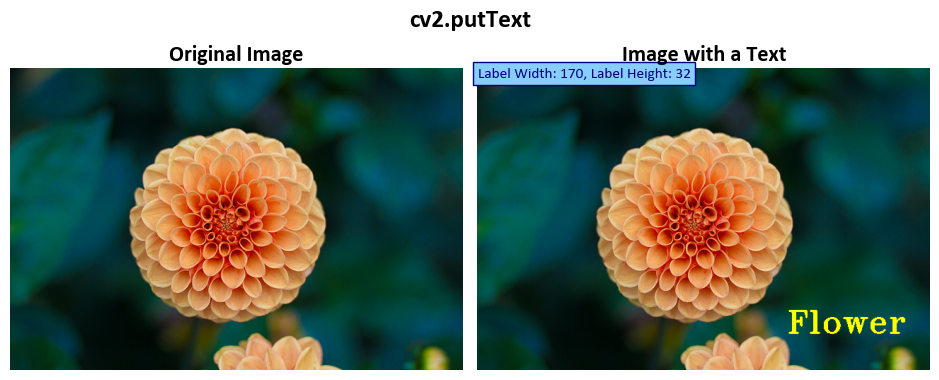

In [9]:
import cv2
from sklearn.datasets import load_sample_image

# Load an example image
Img = load_sample_image('flower.jpg')
Out = Img.copy()  # Create a copy of the image

# Calculate the size of the text label to be added
(label_width, label_height), baseline = cv2.getTextSize(text= 'Flower',
                                                        fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1.5,
                                                        thickness=2)

# Add a text label to the 'Out' image
Out = cv2.putText(Out, text= 'Flower',
                  org=(Out.shape[1] - label_width - int(0.05 * Out.shape[1]),
                       Out.shape[0] - label_height - int(0.05 * Out.shape[0])),
                  fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=1.5, color=Colors['Yellow'], thickness=2)

# Show the original and modified images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Image with a Text'],
                 title='cv2.putText')

# Add a text label indicating the label width and height
label_info = f'Label Width: {label_width}, Label Height: {label_height}'
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s=label_info, size=11, color='Navy',
               bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

Here's the explanation:

1. `Img = Images[1].copy()`: We begin by making a copy of the second image (`Images[1]`) from the list of sample images. The image data is copied into the `Img` variable.

2. `Out = Img.copy()`: We create a duplicate of the `Img` image and store it in the variable `Out`. This duplicate image is where we will add the text label.

3. `(label_width, label_height), baseline = cv2.getTextSize(...)`: We use the `cv2.getTextSize` function to calculate the width and height of the text label that will be added to the image. This function takes several parameters:
   - `text`: The text content of the label (in this case, it's the name extracted from `Names[1]`).
   - `fontFace`: The font type (here, it's `cv2.FONT_HERSHEY_TRIPLEX`).
   - `fontScale`: The font scale (1.5 times the default size).
   - `thickness`: The thickness of the text.

4. `Out = cv2.putText(...)`: We add the text label to the `Out` image using the `cv2.putText` function. The parameters specify:
   - `text`: The text content of the label (the extracted name).
   - `org`: The starting position of the text. It's calculated based on the dimensions of the `Out` image and positioned in the bottom-right corner with a small margin.
   - `fontFace`: The font type (here, it's `cv2.FONT_HERSHEY_TRIPLEX` to match the calculation).
   - `fontScale`: The font scale (1.5 times the default size).
   - `color`: The color of the text (specified as 'Yellow' from the predefined color dictionary).
   - `thickness`: The thickness of the text.

5. Finally, we use the `ImShow` function to display both the original image (`Img`) and the modified image with the rectangle and clipped line (`Out`). The titles are set to 'Original Image' and 'Image with a Rectangle Area and Clipped Line.' Additionally, we add a text label in the bottom-left corner of the modified image to indicate the width and height of the label.